In [49]:
# =======================

#  BIGRAM NAME GENERATOR

# =======================

In [50]:
# Load the data

names = open('names.txt').read().splitlines()

In [51]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [52]:
min(len(n) for n in names)

2

In [53]:
max(len(n) for n in names)

15

In [54]:
# -----------------------

#  1. Pure Python bigram

# -----------------------

In [55]:
D = {} # create a dictionary

for n in names:

    new_n = ['<S>'] + list(n) + ['<E>']

    for ch1, ch2 in zip(new_n, new_n[1:]): 
        
        # zip is weird, but you can picture it as a folder holding two files:
        # ch1 → new_n, ch2 → new_n[1:]
        
        bigram = (ch1, ch2) # build a tuple
        
        # Very simple: count occurrences for our bigram statistics.
        # We look at two consecutive characters and predict the second one from the first.
        
        D[bigram] = D.get(bigram, 0)+ 1 # If the tuple (ch1, ch2) is already in D, 
        #D.get returns its current count (e.g., 1, 2, 3). “+1” bumps it by one.

In [56]:
# .items() turns the dict into (key, value) pairs
sorted(D.items(), key= lambda kv: -kv[1])[:10] # minus sign → descending order
# Example: (('n','<E>'), 6763), (('a','<E>'), 6640)
# ‘n’ is more likely to end a name than ‘a’. Statistics!

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [57]:
# -----------------------

#  2. Torch intro

# -----------------------

In [58]:
import torch
torch.set_printoptions(sci_mode=False)

In [59]:
a = torch.zeros((3,5), dtype=torch.int32)# a simple tensor (multi-dim array)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [60]:
# Quick sanity check: our eventual 2-D array will be 26×26
# plus two side tokens '<S>' and '<E>'.

# Unique characters in the corpus

int_ch = sorted(list(set(''.join(names)))) # Nice and quick: set() kills duplicates, so we keep only the
# alphabet letters—26 of them, indexed 0-25.

# ''.join(names) would concatenate all names into one giant string.

In [61]:
# Assign an index to every character

atoz = {i:s for s,i in enumerate(int_ch)}
atoz['<S>'] = 26
atoz['<E>'] = 27

# atoz lets us map characters to integers for the 28×28 array
atoz

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [62]:
# -----------------------

#  3. Count bigrams into a 28×28 tensor

# -----------------------

In [100]:
# N is my 28x28 2D array

N = torch.zeros((28,28), dtype=torch.int32)

for n in names:

    new_n = ['<S>'] + list(n) + ['<E>']

    for ch1,ch2 in zip(new_n, new_n[1:]):

        x1 = atoz[ch1] # map chars to indices

        x2 = atoz[ch2]

        #print(x1,x2)

        N[x1, x2] += 1 # e.g. N[26,4] = 0+1 every time (‘<S>’,‘e’) appears

N[:10] # looks messy let’s pretty print it

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [64]:
ztoa = {i:s for s,i in atoz.items()} # Reverse lookup: idx → char

#for i in range(28):

    #for j in range(28):

        #print(ztoa[i] + ztoa[j])  # Fetch the characters for each matrix cell

In [65]:
# -----------------------

#  4. Heat-map visualisation

# -----------------------

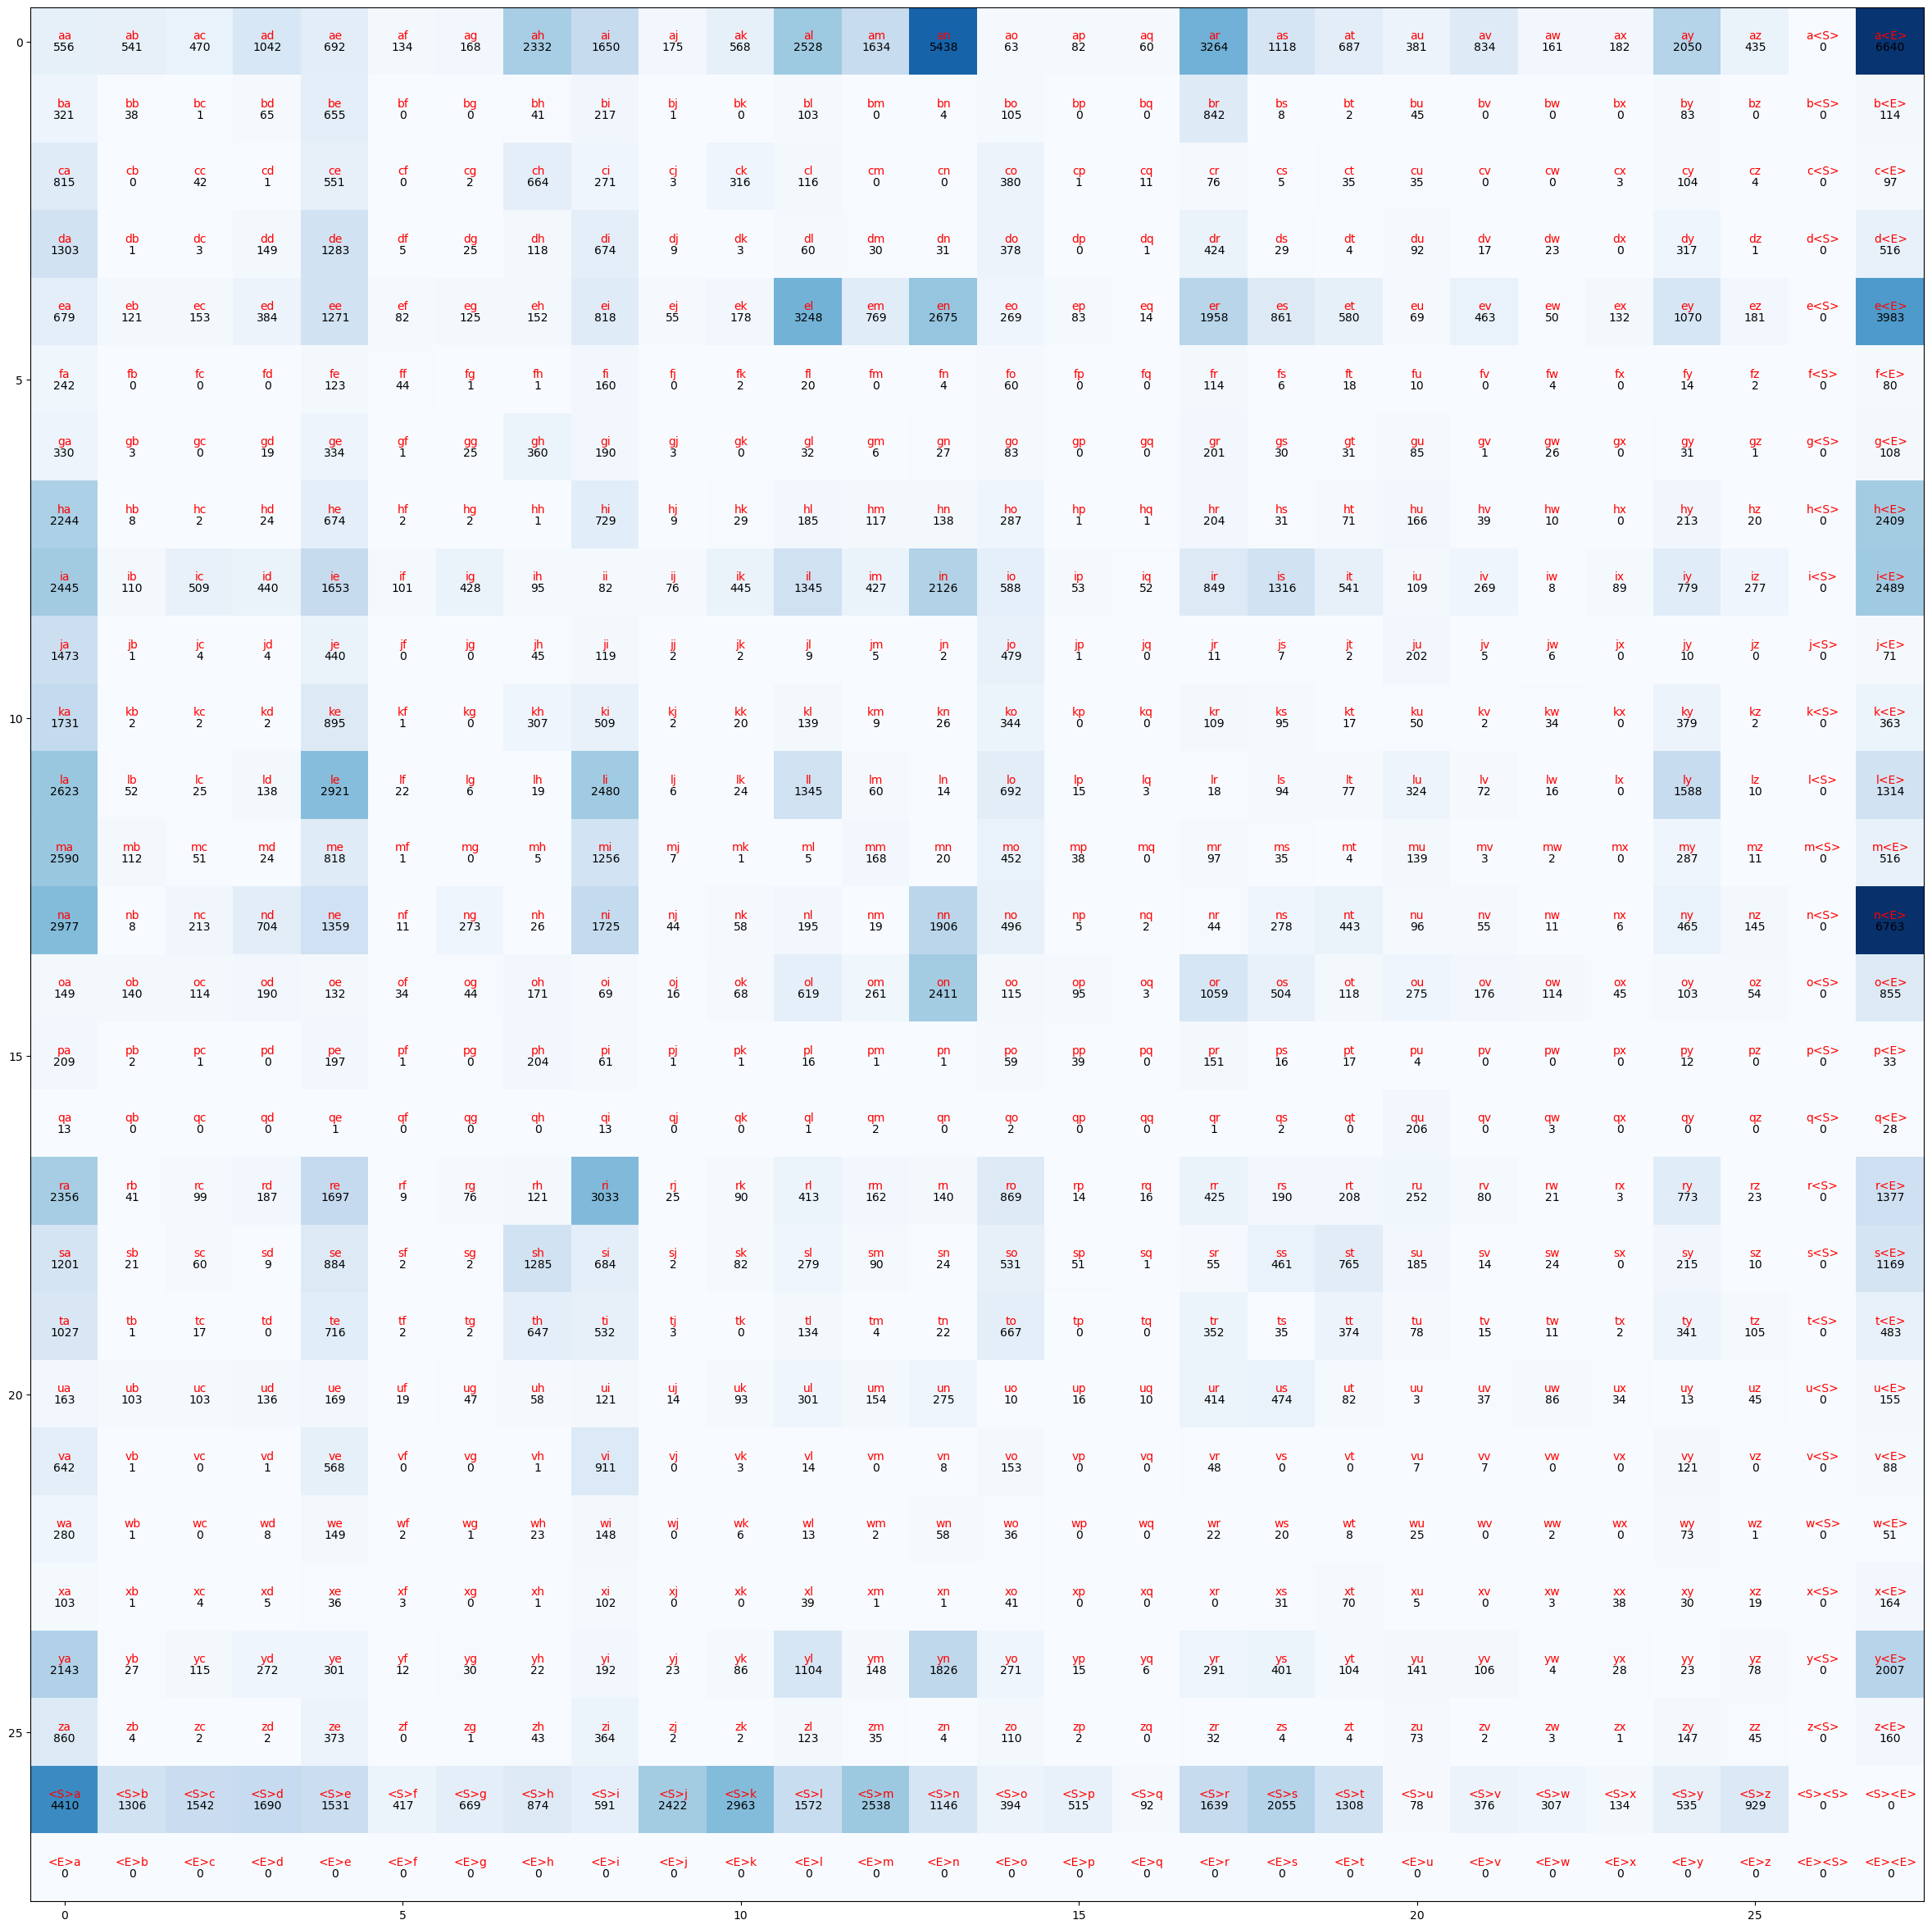

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,30))
plt.imshow(N, cmap='Blues')

for i in range(28):

    for j in range(28):

        chars = ztoa[i] + ztoa[j]

        plt.text(j, i, chars, ha= 'center', va= 'bottom', color='red') # Note: swap (j,i) to avoid a visual transpose.
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color= 'black') # N[i,j] is a tensor to get the value from a tensor we include .item()

plt.show()
plt.close()

# Voilà!
# Brackets denote special tokens.
# Observations:
#   • Pairs like <E><E>, <S><S>, <S><E>, <E><S> shouldn’t exist—no word there.
#   • <E>→<S> isn’t logical, so our first approach is a bit off.

In [67]:
# -----------------------

#  5. Cleaner scheme: use “.” as boundary

# -----------------------

In [99]:
N_new = torch.zeros((27,27), dtype= torch.int32)

atoz_new = {i:s + 1 for s,i in enumerate(int_ch)} # shift A-Z to 1-26
atoz_new['.'] = 0 # 0 marks the boundary

ztoa_new = {i:s for s,i in atoz_new.items()}

for n in names:

    char = ['.'] + list(n) + ['.']

    for ch1, ch2 in zip(char, char[1:]):

        xt1 = atoz_new[ch1]
        xt2 = atoz_new[ch2]

        N_new[xt1, xt2] += 1

# Quick peek
N_new[:10]

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

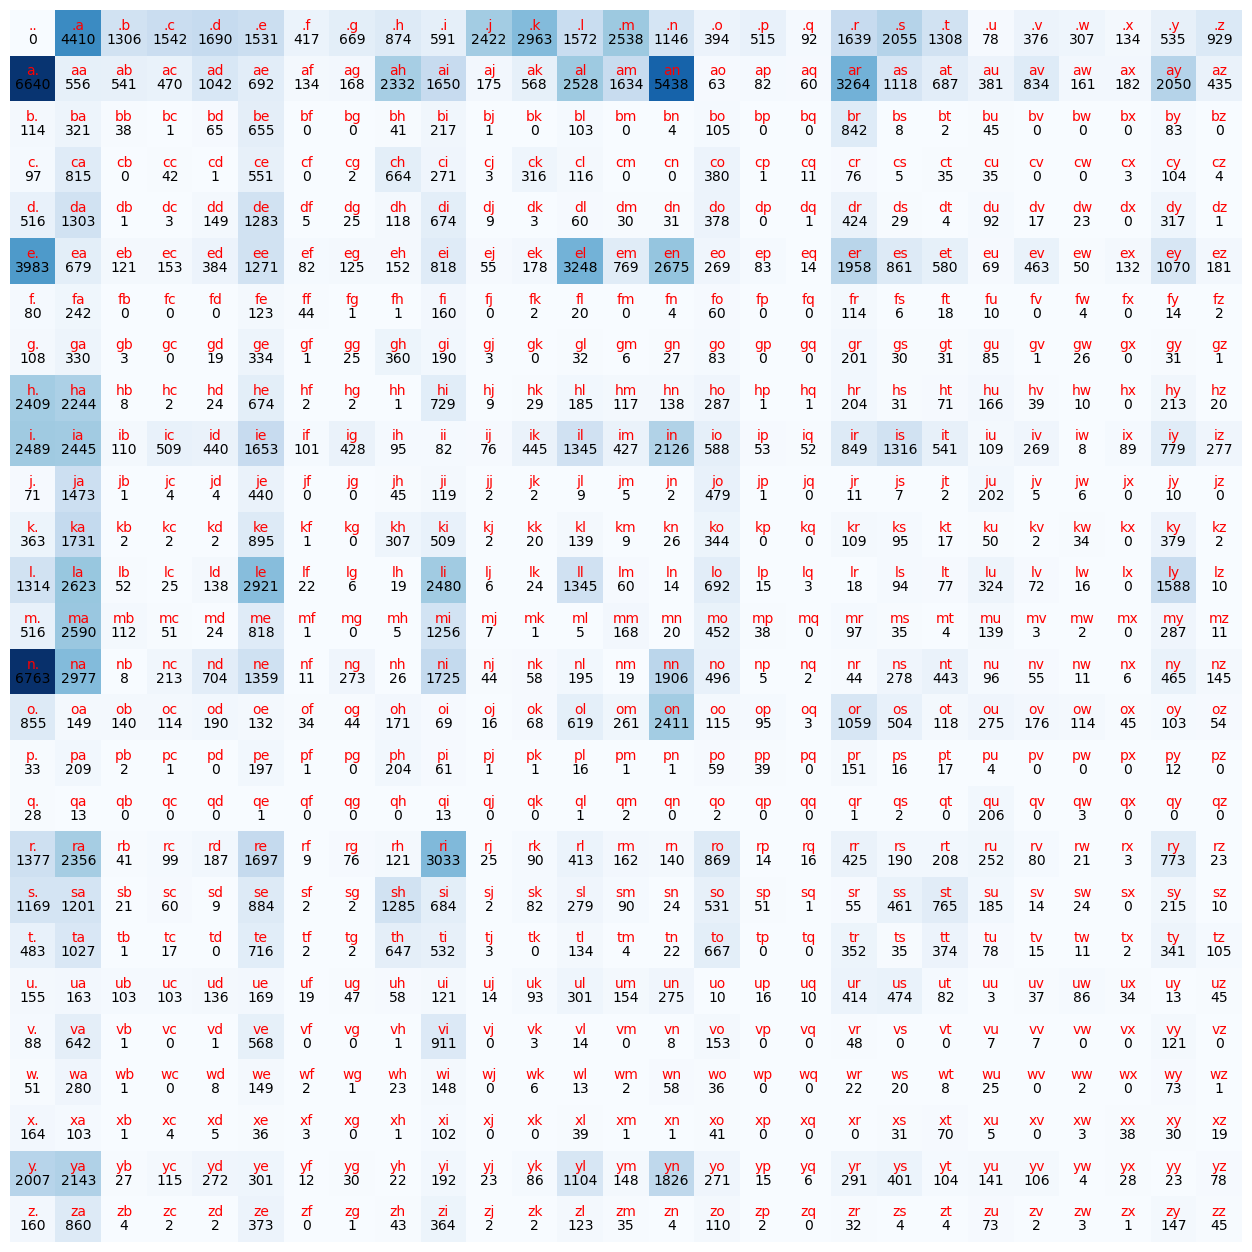

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N_new, cmap='Blues')

for i in range(27):

    for j in range(27):

        chstr = ztoa_new[i] + ztoa_new[j]

        plt.text(j, i, chstr, ha='center', va ='bottom', color='red')
        plt.text(j,i, N_new[i,j].item(), ha='center', va= 'top', color= 'black')

plt.axis('off'); # full screen view
plt.show()
plt.close()

In [70]:
# -----------------------

#  6. Sampling a first letter

# -----------------------

In [71]:
N_new[0] # counts for “.x”

p = N_new[0].float() # Transform the data type to float

In [72]:
p /= p.sum() # calculating the probability distribution

print(p)

p.sum()  # sanity check → 1.0

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


tensor(1.)

In [73]:
# -----------------------

#  7. Quick sampling demo

# -----------------------

In [74]:
g = torch.Generator().manual_seed(2147483647)  # deterministic

p_test = torch.rand(3, generator=g) #  3 random values following normal distribution

p_test

tensor([0.7081, 0.3542, 0.1054])

In [75]:
# calculating now the probability of this test

p_test /= p_test.sum()

p_test 
#lets test

tensor([0.6064, 0.3033, 0.0903])

In [76]:
# multinomial the function generate samples given the probability distribution

torch.multinomial(p_test, num_samples=100, replacement=True, generator=g) # Sample 100 start letters from p_test
 # 32-1, 64-0 and 4-2 

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [77]:
# now lets apply it to our probability distribution

idx = torch.multinomial(p, num_samples=100, replacement=True, generator=g)

print(idx) # each number represent a word 

print(ztoa_new[26]) # 26 maps to ‘z’

tensor([19,  4,  4,  5, 19,  3,  1,  2, 10,  1, 13,  4, 19, 19,  1, 10, 13,  5,
        22, 10,  1, 19, 19,  8,  6,  3, 13, 13, 13, 10, 19,  5, 16, 19, 12,  5,
         1, 13, 16, 19, 13, 11,  1,  9, 12, 11, 19, 13, 10,  7,  3,  4, 11, 14,
         4,  4, 19, 12,  1, 10, 22, 11, 14, 14, 26, 12, 19, 13, 26, 11, 11, 19,
        13, 12,  4, 23, 26,  2,  5, 12,  3,  1, 12, 25,  5, 10, 13,  2, 20,  1,
        19,  2, 26, 11, 16, 11,  1,  1,  1, 13])
z


In [78]:
# -----------------------

#  8. Generate some names (bigram model)

# -----------------------

In [79]:
g_copy = torch.Generator().manual_seed(2147483647) 

ix = 0

for i in range(10):

    out= []

    while True:

        Prob = N_new[ix].float()
        Prob /= Prob.sum()

        ix = torch.multinomial(Prob, num_samples= 1, replacement= True, generator=g_copy).item()

        out.append(ztoa_new[ix])

        if ix == 0 : # boundary reached
            break

    print(''.join(out))  # e.g. “cexze” – nonsense, but that’s a vanilla bigram!

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [80]:
# -----------------------

#  9. Pre-compute full probability matrix P

# -----------------------

In [81]:
P = (N_new + 1).float()          # add one smoothing
P /= P.sum(1, keepdim=True)      # row wise normalisation
P[0].sum()                       # still 1

tensor(1.)

In [82]:
# -----------------------

# 10. Evaluate with average negative log-likelihood (NLL)

# -----------------------

In [83]:
Loglikelihood = 0.0
n_x = 0

for n in names:
    chrs = ['.'] + list(n) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        ix1 = atoz_new[ch1]
        ix2 = atoz_new[ch2]
        prob = P[ix1, ix2]
        Loglikelihood += torch.log(prob)
        n_x += 1

loss = -Loglikelihood / n_x
print(f'NLL = {loss:.4f}')  # ≈ 2.45 – lower is better


NLL = 2.4544


In [84]:
# -----------------------
# 11. Toy example: “aminejq”
# -----------------------
for n in ['aminejq']:
    Loglikelihood = n_x = 0
    chrs = ['.'] + list(n) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        ix1 = atoz_new[ch1]
        ix2 = atoz_new[ch2]
        prob = P[ix1, ix2]
        Loglikelihood += torch.log(prob)
        n_x += 1
        print(f'{ch1}{ch2}: {prob:.4f}')
    print('Avg NLL:', (-Loglikelihood / n_x).item())

.a: 0.1376
am: 0.0482
mi: 0.1885
in: 0.1200
ne: 0.0741
ej: 0.0027
jq: 0.0003
q.: 0.0970
Avg NLL: 3.4528048038482666


In [85]:
# Bigram summary:
#   • Build counts, turn them into probabilities.
#   • Evaluate with average NLL (Classification).
#   • The closer to 0, the better.

In [86]:
# -----------------------

# 12. Neural-net alternative

# -----------------------

In [87]:
xs, ys = [], []  # input char, target char

for n in names[:1]:
    chrs = ['.'] + list(n) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        xs.append(atoz_new[ch1])
        ys.append(atoz_new[ch2])
        print(f'{ch1=}, {ch2=}')

xs = torch.tensor(xs)
ys = torch.tensor(ys)

ch1='.', ch2='e'
ch1='e', ch2='m'
ch1='m', ch2='m'
ch1='m', ch2='a'
ch1='a', ch2='.'


In [88]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()  # one-hot → float

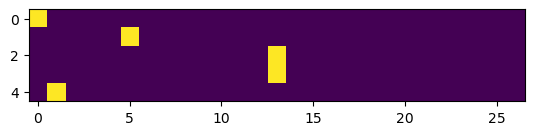

In [89]:
plt.imshow(xenc)  # yellow dots at positions 0,1,5,13,13
plt.show()
plt.close()

In [90]:
# One linear layer, random init
weight = torch.randn((27, 27))
logits = xenc @ weight
counts = logits.exp()
probab = counts / counts.sum(1, keepdim=True)  # softmax “by hand”
probab

tensor([[0.0104, 0.0312, 0.0105, 0.0342, 0.0068, 0.0400, 0.0227, 0.0076, 0.0153,
         0.0996, 0.0540, 0.0387, 0.0091, 0.1748, 0.0366, 0.0168, 0.0241, 0.0099,
         0.0010, 0.0184, 0.0453, 0.0116, 0.0545, 0.0144, 0.0098, 0.1959, 0.0067],
        [0.0061, 0.0150, 0.0406, 0.0147, 0.0366, 0.0174, 0.0160, 0.0091, 0.0039,
         0.0117, 0.0317, 0.0203, 0.0250, 0.0233, 0.0339, 0.0250, 0.1310, 0.0345,
         0.0359, 0.0047, 0.1254, 0.0268, 0.0695, 0.0822, 0.0567, 0.0133, 0.0898],
        [0.0339, 0.0660, 0.0371, 0.0220, 0.1195, 0.0210, 0.0595, 0.0196, 0.1386,
         0.0149, 0.0116, 0.0446, 0.0268, 0.1046, 0.0096, 0.0253, 0.0250, 0.0563,
         0.0055, 0.0268, 0.0064, 0.0184, 0.0043, 0.0317, 0.0550, 0.0040, 0.0121],
        [0.0339, 0.0660, 0.0371, 0.0220, 0.1195, 0.0210, 0.0595, 0.0196, 0.1386,
         0.0149, 0.0116, 0.0446, 0.0268, 0.1046, 0.0096, 0.0253, 0.0250, 0.0563,
         0.0055, 0.0268, 0.0064, 0.0184, 0.0043, 0.0317, 0.0550, 0.0040, 0.0121],
        [0.0162, 0.0074,

In [91]:
probab[0].sum() # 1.0

tensor(1.)

In [92]:
# -----------------------

# 13. Full data set

# -----------------------

In [93]:
xs, ys = [], []
for n in names:
    chrs = ['.'] + list(n) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        xs.append(atoz_new[ch1])
        ys.append(atoz_new[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [94]:
o = 5
nlls = torch.zeros(o)
for i in range(o):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {ztoa_new[x]}{ztoa_new[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probab[i])
  print('label (actual next character):', y)
  p = probab[i, y]
  print('probability assigned by the net to the the correct character:', p.item()) 
  logp = torch.log(p)
  neglogp = - logp
  print('log likelihood:', logp.item())
  print('negative log likelihood:', neglogp.item())
  nlls[i] = neglogp

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item()) # Our single value evaluation


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0104, 0.0312, 0.0105, 0.0342, 0.0068, 0.0400, 0.0227, 0.0076, 0.0153,
        0.0996, 0.0540, 0.0387, 0.0091, 0.1748, 0.0366, 0.0168, 0.0241, 0.0099,
        0.0010, 0.0184, 0.0453, 0.0116, 0.0545, 0.0144, 0.0098, 0.1959, 0.0067])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.04003020375967026
log likelihood: -3.21812105178833
negative log likelihood: 3.21812105178833
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0061, 0.0150, 0.0406, 0.0147, 0.0366, 0.0174, 0.0160, 0.0091, 0.0039,
        0.0117, 0.0317, 0.0203, 0.0250, 0.0233, 0.0339, 0.0250, 0.1310, 0.0345,
        0.0359, 0.0047, 0.1254, 0.0268, 0.0695, 0.0822, 0.0567, 0.0133, 0.0898])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.02

In [98]:
g = torch.Generator().manual_seed(2_147_483_647)
w = torch.randn((27, 27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27).float()

# Training loop (forward + backward)
for i in range(10):
    logits = xenc @ w
    counts = logits.exp()
    probab = counts / counts.sum(1, keepdim=True)
    loss = -probab[torch.arange(len(xs)), ys].log().mean()
    print(loss.item())
    w.grad = None
    loss.backward()
    w.data += -50 * w.grad  # step with a big LR for demo

3.758953332901001
3.371100664138794
3.1540427207946777
3.020374059677124
2.927711248397827
2.8604023456573486
2.8097290992736816
2.7701022624969482
2.7380728721618652
2.711496353149414


In [96]:
# -----------------------

# 14. Generate names via the trained NN

# -----------------------

In [97]:
g = torch.Generator().manual_seed(2_147_483_647)
ix = 0

for _ in range(10):
    out = []
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ w
        counts = logits.exp()
        probab = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(probab, 1, True, generator=g).item()
        out.append(ztoa_new[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyauelalerigotai.
moliellavo.
ke.
teda.
